# Lab:  Simple linear regression

In this lab, you will load data, plot data, perform simple mathematical manipulations, and fit a simple linear regression model.  Before doing this lab, you can go through the [demo](./demo2_auto_mpg.ipynb) to see an example of these operations on an automobile dataset.  The lab use the Boston housing data set, a widely-used machine learning data set for illustrating basic concepts.  

## Loading the data

The Boston housing data set was collected in the 1970s to study the relationship between house price and various factors such as the house size, crime rate, socio-economic status, etc.  Since the variables are easy to understand, the data set is ideal for learning basic concepts in machine learning.  The raw data and a complete description of the dataset can be found on the UCI website:

https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names

In the lab, you will complete all the code marked `TODO`. 

First, complete the following code that uses the `pd.read_csv` command to read the data from the file located at

https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data

I have supplied a list `names` of the column headers.  You will have to set the options in the `read_csv` command to correctly delimit the data in the file and name the columns correctly.

In [ ]:
import pandas as pd
import numpy as np
names =[
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 
    'AGE',  'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE'
]

# TODO:  Complete the code
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/'+
                 'housing.data',
                 header=None,delim_whitespace=True,names=names,na_values='?')

Display the first six rows of the data frame

In [ ]:
# TODO
df.head(6)
# TODO

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7


## Basic Manipulations on the Data

What is the shape of the data?  How many attributes are there?  How many samples?
Print a statement of the form:

    num samples=xxx, num attributes=yy

In [ ]:
# TODO
nsamp,natt=df.shape
natt

14

Create a response vector `y` with the values in the column `PRICE`.  The vector `y` should be a 1D `numpy.array` structure.

In [ ]:
# TODO
y = np.array((df['PRICE']))
y.shape

(506,)

Use the response vector `y` to find the mean house price in thousands and the fraction of homes that are above $40k. (You may realize this is very cheap.  Prices have gone up a lot since the 1970s!).   Create print statements of the form:

    The mean house price is xx.yy thousands of dollars.
    Only x.y percent are above $40k.

In [ ]:
# TODO
mean=np.mean(y)
print("The mean house price is {0:7.2f} thousands of dollars".format(mean))
I = (y>40)
per=(np.mean(y*I)/np.mean(I))
print("Only {0:7.1f} percent are above $40k".format(per))

The mean house price is   22.53 thousands of dollars
Only    47.5 percent are above $40k


## Visualizing the Data

Python's `matplotlib` has very good routines for plotting and visualizing data that closely follows the format of MATLAB programs.  You can load the `matplotlib` package with the following commands.

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

Similar to the `y` vector, create a predictor vector `x` containing the values in the `RM` column, which represents the average number of rooms in each region.

In [ ]:
# TODO
x =np.array((df['RM']))
x.shape

(506,)

Create a scatter plot of the price vs. the `RM` attribute.  Make sure your plot has grid lines and label the axes with reasonable labels so that someone else can understand the plot.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


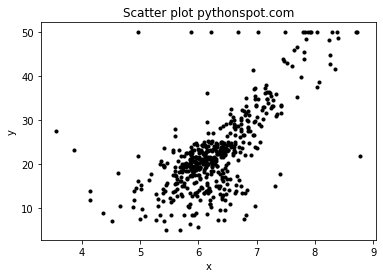

In [ ]:
# 
colors = (0,0,0)
area = np.pi*3
plt.scatter(x, y, s=area, c=colors)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Fitting a Simple Linear Model

We will write a simple function to perform a linear fit. Use the formulae given in the class, to compute the parameters $\beta_0,\beta_1$ in the linear model $$y =\beta_0 + \beta_1 x + \epsilon$$ as well as the coefficient of determination $R^2$.

In [ ]:
def fit_linear(x,y):
    """
    Given vectors of data points (x,y), performs a fit for the linear model:
       yhat = beta0 + beta1*x, 
    The function returns beta0, beta1 and rsq, where rsq is the coefficient of determination.
    """
    # TODO complete the following code
    ym = np.mean(y)
    syy = np.mean((y-ym)**2)
    Rsq = np.zeros(natt)
    beta0 = np.zeros(natt)
    beta1 = np.zeros(natt)
    k=0
    xm = np.mean(x)
    sxy = np.mean((x-xm)*(y-ym))
    sxx = np.mean((x-xm)**2)
    beta1 = sxy/sxx
    beta0 = ym - beta1*xm
    Rsq = (sxy)**2/sxx/syy
    # beta0 = ...
    # beta1 = ...
    # rsq = ...
    return beta0, beta1, rsq

Using the function `fit_linear` above, print the values `beta0`, `beta1` and `rsq` for the linear model of price vs. number of rooms.

In [ ]:
# TODO
beta0,beta1,rsq=fit_linear(x,y)
rsq

56.39944822883044

Replot the scatter plot above, but now with the regression line.  You can create the regression line by creating points `xp` from say 4 to 9, computing the linear predicted values `yp` on those points and plotting `yp` vs. `xp` on top of the above plot.

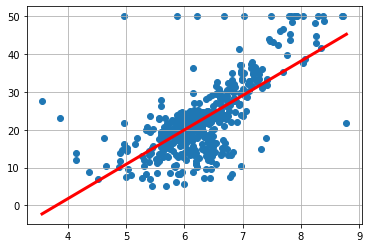

In [ ]:
# TODO
imax = np.argmax(Rsq)
imax
xmin = np.min(x)
xmax = np.max(x)
ymin = beta0 + beta1*xmin
ymax = beta0 + beta1*xmax
plt.plot([xmin,xmax], [ymin,ymax], 'r-', linewidth=3)

# Scatter plot of points
plt.scatter(x,y)
plt.grid()
# Regression line over the range of x values

import  sklearn.model_selection 

# Create a k-fold object
nfold = 10
kf = sklearn.model_selection.KFold(n_splits=nfold,shuffle=True)

# Model orders to be tested
dtest = np.arange(10,200,10);
nd = len(dtest);
print(dtest)
# TODO. 
RSSTS = np.zeros((nd,nfold));
for isplit, IND in enumerate(kf.split(X0)):
    # Get the training data in the split
    Itr, Its = IND; 
    #kf.split( ) returns Ind, which contains the indices to the training and testing data for each fold 
    xtr = X0[Itr];
    ytr = Y0[Itr];
    xts = X0[Its];
    yts = Y0[Its];
    # Loop over the model order
    for it, d in enumerate(dtest):
      # Fit data on training data
      beta_hat = poly.polyfit(xtr[:,dop],ytr,d)      
        # Measure RSS on test data
      yhat = poly.polyval(xts[:,dop],beta_hat)
      RSSTS[it,isplit] = np.mean((yhat-yts)**2)
    print(it)
    print(isplit)

    RSS_mean = np.mean(RSSTS,axis=1) #note mean is taken over the second dimension, i.e. all folds for the same model order
RSS_std  = np.std(RSSTS,axis=1)/np.sqrt(nfold-1)
plt.errorbar(dtest, RSS_mean, yerr=RSS_std, fmt='-')
plt.xlabel('Model order')
plt.ylabel('Test RSS')
plt.grid()

# Compute coefficients of determination

We next compute the $R^2$ values for all the predictors and output the values in a table. Your table should look like the following, where each the first column is the attribute name and the second column is the $R^2$ value.

    CRIM        0.151
    ZN          0.130
    INDUS       0.234
    ...         ...

To index over the set of colunms in the dataframe `df`, you can either loop over the items in the `names` lists (skipping over the final name `PRICE`) or loop over integer indices and use the method, `df.iloc`.

In [ ]:
# TODO
df.iloc